In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [117]:
import pandas as pd
#import necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer




In [118]:
# Importing dataset
data = pd.read_csv("/kaggle/input/zone-area-0ccupancy/zone_occupancy.csv")


In [119]:
data.head(10)

,Zone,2018,2019,2020,2021,2022
0,Coastal_Beach,"3,329,000","3,491,300","1,502,600","1,967,800","2,347,900"
1,Coastal_Other,"280,400","285,100","87,200","142,700","154,800"
2,Coastal_Hinterland,"107,500","112,000","110,000","62,300","165,800"
3,Nairobi_High Class,"1,371,700","1,430,600","573,700","1,007,700","1,301,800"
4,Nairobi_Other,"657,000","774,300","318,300","509,700","539,700"
5,Central,"1,128,500","947,900","421,200","739,800","1,034,800"
6,Masailand,"827,000","801,000","171,200","362,300","727,300"
7,Nyanza _Basin,"226,000","382,500","181,200","265,100","284,000"
8,Western,"560,300","695,000","357,400","383,900","338,100"
9,Northern,"130,600","138,600","80,300","75,700","114,700"


In [103]:
data.tail

<bound method NDFrame.tail of                    Zone         2018         2019         2020         2021  \
0         Coastal_Beach   3,329,000    3,491,300    1,502,600    1,967,800    
1        Coastal_Other      280,400      285,100       87,200      142,700    
2   Coastal_Hinterland      107,500      112,000      110,000       62,300    
3   Nairobi_High Class    1,371,700    1,430,600      573,700    1,007,700    
4        Nairobi_Other      657,000      774,300      318,300      509,700    
5               Central   1,128,500      947,900      421,200      739,800    
6            Masailand      827,000      801,000      171,200      362,300    
7        Nyanza _Basin      226,000      382,500      181,200      265,100    
8              Western      560,300      695,000      357,400      383,900    
9              Northern     130,600      138,600       80,300       75,700    
10                  NaN          NaN          NaN          NaN          NaN   

           2022  
0  

In [104]:
# List columns in the DataFrame
print(data.columns)




Index(['Zone', '2018', '2019', '2020', '2021', '2022'], dtype='object')


In [105]:
data.dtypes

Zone    object
2018    object
2019    object
2020    object
2021    object
2022    object
dtype: object

In [106]:
row = data.iloc[10]



In [73]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    10 non-null     object
 1   2018    10 non-null     object
 2   2019    10 non-null     object
 3   2020    10 non-null     object
 4   2021    10 non-null     object
 5   2022    10 non-null     object
dtypes: object(6)
memory usage: 656.0+ bytes


In [107]:
data.head(10)

,Zone,2018,2019,2020,2021,2022
0,Coastal_Beach,"3,329,000","3,491,300","1,502,600","1,967,800","2,347,900"
1,Coastal_Other,"280,400","285,100","87,200","142,700","154,800"
2,Coastal_Hinterland,"107,500","112,000","110,000","62,300","165,800"
3,Nairobi_High Class,"1,371,700","1,430,600","573,700","1,007,700","1,301,800"
4,Nairobi_Other,"657,000","774,300","318,300","509,700","539,700"
5,Central,"1,128,500","947,900","421,200","739,800","1,034,800"
6,Masailand,"827,000","801,000","171,200","362,300","727,300"
7,Nyanza _Basin,"226,000","382,500","181,200","265,100","284,000"
8,Western,"560,300","695,000","357,400","383,900","338,100"
9,Northern,"130,600","138,600","80,300","75,700","114,700"


In [120]:
import pandas as pd

# Create DataFrame from the given data
data = pd.DataFrame({
    'Zone': ['Coastal_Beach', 'Coastal_Other', 'Coastal_Hinterland', 'Nairobi_High Class', 'Nairobi_Other',
             'Central', 'Masailand', 'Nyanza_Basin', 'Western', 'Northern'],
    '2018': [3329000, 280400, 107500, 1371700, 657000, 1128500, 827000, 226000, 560300, 130600],
    '2019': [3491300, 285100, 112000, 1430600, 774300, 947900, 801000, 382500, 695000, 138600],
    '2020': [1502600, 87200, 110000, 573700, 318300, 421200, 171200, 181200, 357400, 80300],
    '2021': [1967800, 142700, 62300, 1007700, 509700, 739800, 362300, 265100, 383900, 75700],
    '2022': [2347900, 154800, 165800, 1301800, 539700, 1034800, 727300, 284000, 338100, 114700]
})

# Perform one-hot encoding
encoded_data = pd.get_dummies(data, columns=['Zone'])

# Display the encoded data
print(encoded_data)


      2018     2019     2020     2021     2022  Zone_Central  \
0  3329000  3491300  1502600  1967800  2347900         False   
1   280400   285100    87200   142700   154800         False   
2   107500   112000   110000    62300   165800         False   
3  1371700  1430600   573700  1007700  1301800         False   
4   657000   774300   318300   509700   539700         False   
5  1128500   947900   421200   739800  1034800          True   
6   827000   801000   171200   362300   727300         False   
7   226000   382500   181200   265100   284000         False   
8   560300   695000   357400   383900   338100         False   
9   130600   138600    80300    75700   114700         False   

   Zone_Coastal_Beach  Zone_Coastal_Hinterland  Zone_Coastal_Other  \
0                True                    False               False   
1               False                    False                True   
2               False                     True               False   
3              

In [121]:
data.head(9)

,Zone,2018,2019,2020,2021,2022
0,Coastal_Beach,3329000,3491300,1502600,1967800,2347900
1,Coastal_Other,280400,285100,87200,142700,154800
2,Coastal_Hinterland,107500,112000,110000,62300,165800
3,Nairobi_High Class,1371700,1430600,573700,1007700,1301800
4,Nairobi_Other,657000,774300,318300,509700,539700
5,Central,1128500,947900,421200,739800,1034800
6,Masailand,827000,801000,171200,362300,727300
7,Nyanza_Basin,226000,382500,181200,265100,284000
8,Western,560300,695000,357400,383900,338100


In [122]:
# Summary statistics
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                2018          2019          2020          2021          2022
count  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01
mean   8.618000e+05  9.058300e+05  3.803100e+05  5.517000e+05  7.008900e+05
std    9.659853e+05  9.951290e+05  4.262674e+05  5.802259e+05  7.028101e+05
min    1.075000e+05  1.120000e+05  8.030000e+04  6.230000e+04  1.147000e+05
25%    2.396000e+05  3.094500e+05  1.253000e+05  1.733000e+05  1.953500e+05
50%    6.086500e+05  7.346500e+05  2.497500e+05  3.731000e+05  4.389000e+05
75%    1.053125e+06  9.111750e+05  4.052500e+05  6.822750e+05  9.579250e+05
max    3.329000e+06  3.491300e+06  1.502600e+06  1.967800e+06  2.347900e+06


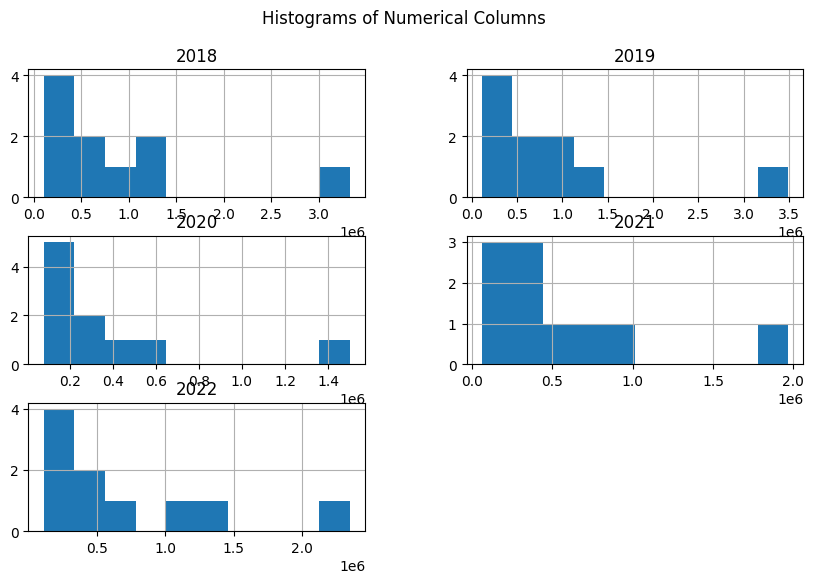

In [123]:
# Data visualization
# Histograms
data.hist(figsize=(10, 6))
plt.suptitle("Histograms of Numerical Columns")
plt.show()




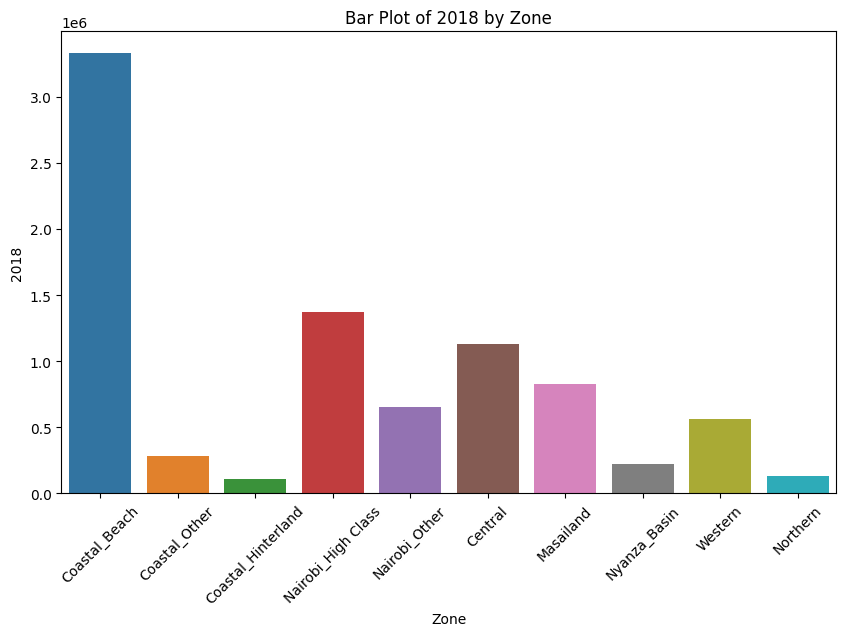

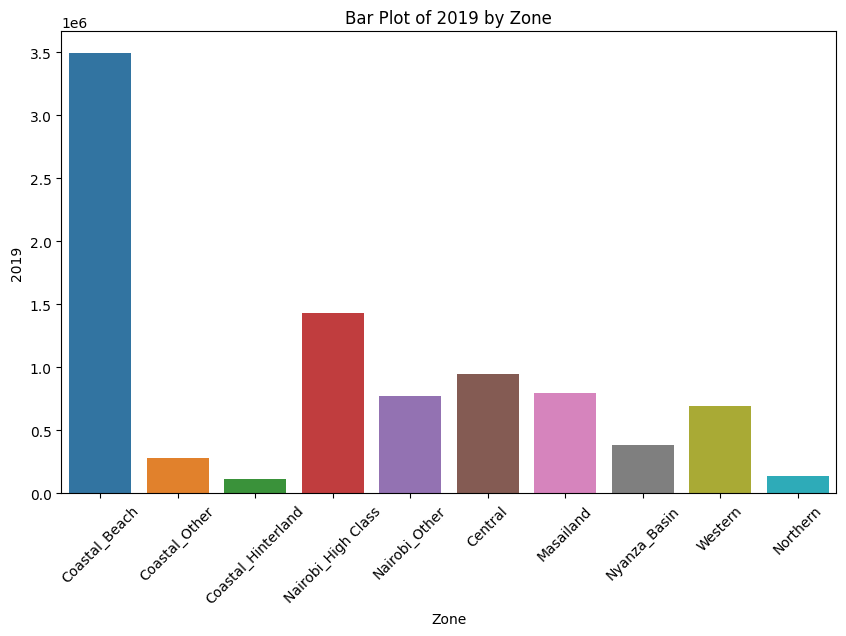

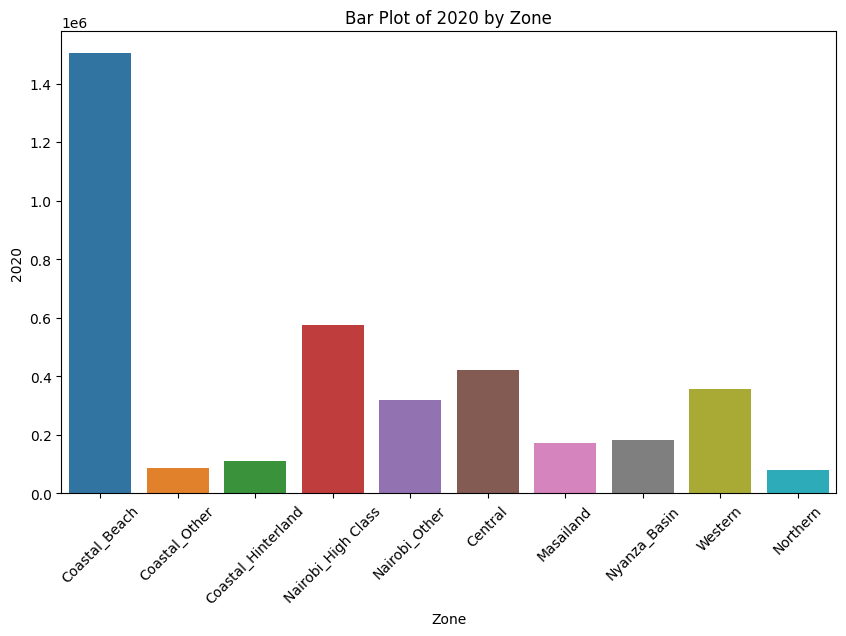

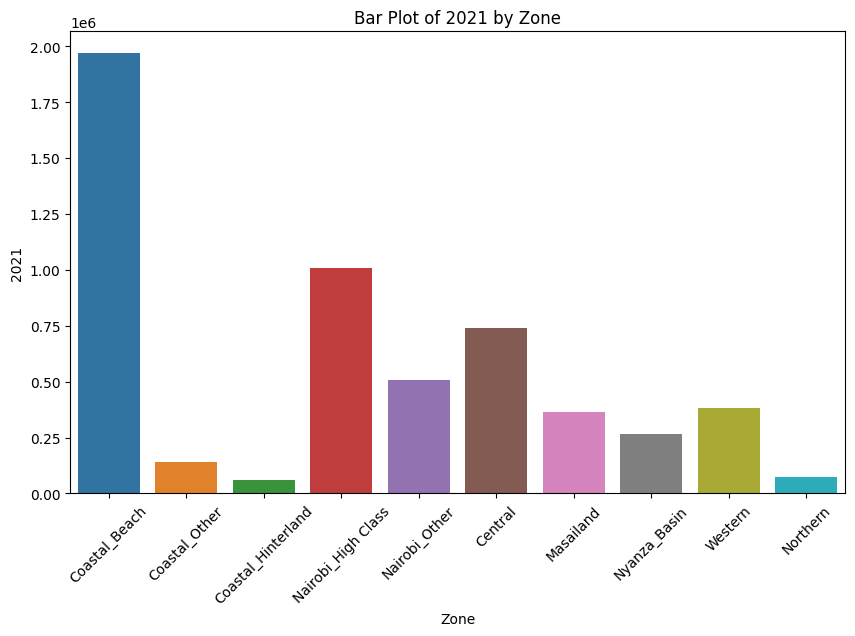

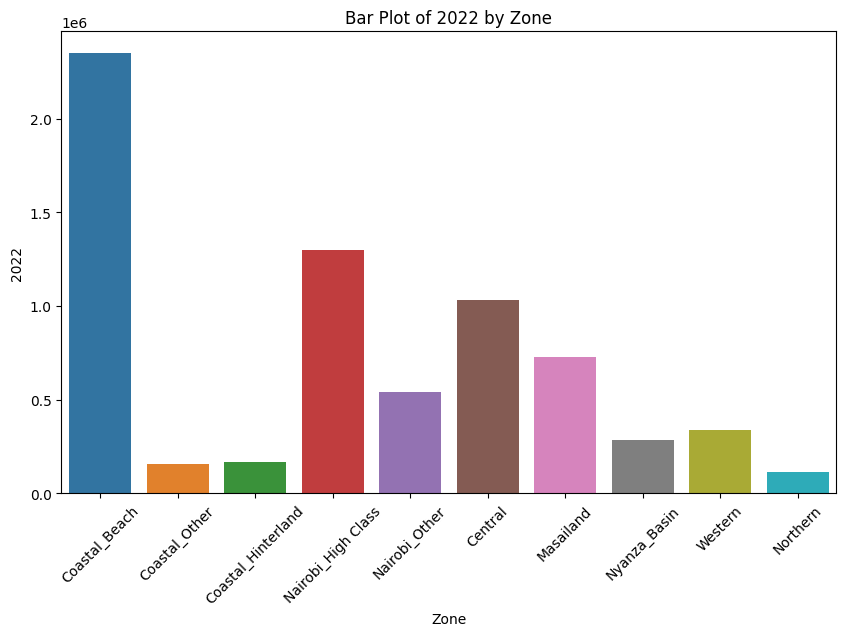

In [124]:
# Bar plots for each year
for year in ['2018', '2019', '2020', '2021', '2022']:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Zone', y=year, data=data)
    plt.title(f'Bar Plot of {year} by Zone')
    plt.xticks(rotation=45)
    plt.xlabel('Zone')
    plt.ylabel(year)
    plt.show()

In [125]:
data.head(10)

,Zone,2018,2019,2020,2021,2022
0,Coastal_Beach,3329000,3491300,1502600,1967800,2347900
1,Coastal_Other,280400,285100,87200,142700,154800
2,Coastal_Hinterland,107500,112000,110000,62300,165800
3,Nairobi_High Class,1371700,1430600,573700,1007700,1301800
4,Nairobi_Other,657000,774300,318300,509700,539700
5,Central,1128500,947900,421200,739800,1034800
6,Masailand,827000,801000,171200,362300,727300
7,Nyanza_Basin,226000,382500,181200,265100,284000
8,Western,560300,695000,357400,383900,338100
9,Northern,130600,138600,80300,75700,114700


In [127]:

data['2018'] = data['2018'].astype(int)
data['2019'] = data['2019'].astype(int)
data['2020'] = data['2020'].astype(int)
data['2021'] = data['2021'].astype(int)
data['2022'] = data['2022'].astype(int)


In [128]:
data.head()

,Zone,2018,2019,2020,2021,2022
0,Coastal_Beach,3329000,3491300,1502600,1967800,2347900
1,Coastal_Other,280400,285100,87200,142700,154800
2,Coastal_Hinterland,107500,112000,110000,62300,165800
3,Nairobi_High Class,1371700,1430600,573700,1007700,1301800
4,Nairobi_Other,657000,774300,318300,509700,539700


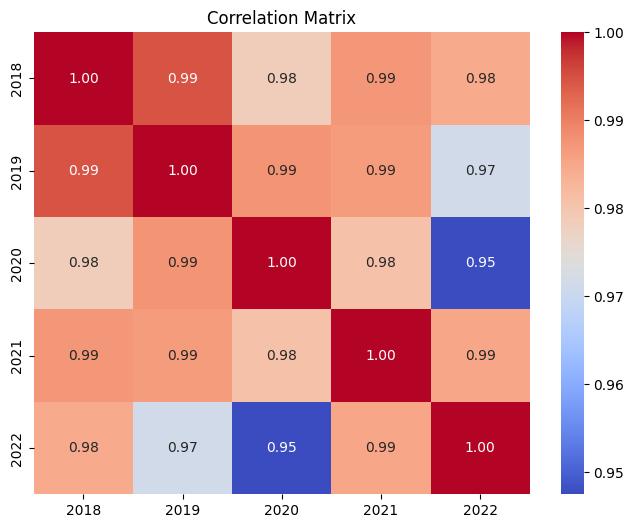

In [129]:
# Drop the "Zone" column before conducting correlation analysis
#data_numeric = data.drop(columns='Zone')

# Correlation analysis
correlation_matrix = data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [132]:
# Correlation analysis
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [131]:
# check for missing values on  datasets
data.isnull().sum()

Zone    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [136]:
data.head(9)

,Zone,2018,2019,2020,2021,2022
0,Coastal_Beach,3329000,3491300,1502600,1967800,2347900
1,Coastal_Other,280400,285100,87200,142700,154800
2,Coastal_Hinterland,107500,112000,110000,62300,165800
3,Nairobi_High Class,1371700,1430600,573700,1007700,1301800
4,Nairobi_Other,657000,774300,318300,509700,539700
5,Central,1128500,947900,421200,739800,1034800
6,Masailand,827000,801000,171200,362300,727300
7,Nyanza_Basin,226000,382500,181200,265100,284000
8,Western,560300,695000,357400,383900,338100


In [137]:
import pandas as pd

# Assuming data is your DataFrame
data = pd.DataFrame({
    'Zone': ['Coastal_Beach', 'Coastal_Other', 'Coastal_Hinterland', 'Nairobi_High Class', 'Nairobi_Other', 'Central', 'Masailand', 'Nyanza_Basin', 'Western'],
    '2018': [3329000, 280400, 107500, 1371700, 657000, 1128500, 827000, 226000, 560300],
    '2019': [3491300, 285100, 112000, 1430600, 774300, 947900, 801000, 382500, 695000],
    '2020': [1502600, 87200, 110000, 573700, 318300, 421200, 171200, 181200, 357400],
    '2021': [1967800, 142700, 62300, 1007700, 509700, 739800, 362300, 265100, 383900],
    '2022': [2347900, 154800, 165800, 1301800, 539700, 1034800, 727300, 284000, 338100]
})

# Sum the visitor counts for each zone across all years
data['Total_Visitors'] = data[['2018', '2019', '2020', '2021', '2022']].sum(axis=1)

# Find the zone with the most visitors
zone_with_most_visitors = data.loc[data['Total_Visitors'].idxmax()]

print("Zone with the most visitors:")
print(zone_with_most_visitors[['Zone', 'Total_Visitors']])


Zone with the most visitors:
Zone              Coastal_Beach
Total_Visitors         12638600
Name: 0, dtype: object


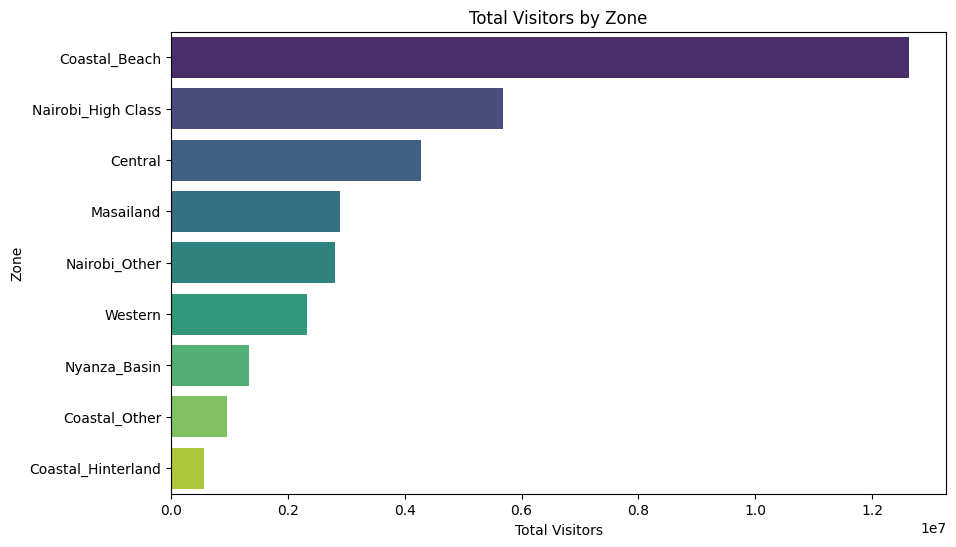

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is your DataFrame
data = pd.DataFrame({
    'Zone': ['Coastal_Beach', 'Coastal_Other', 'Coastal_Hinterland', 'Nairobi_High Class', 'Nairobi_Other', 'Central', 'Masailand', 'Nyanza_Basin', 'Western'],
    '2018': [3329000, 280400, 107500, 1371700, 657000, 1128500, 827000, 226000, 560300],
    '2019': [3491300, 285100, 112000, 1430600, 774300, 947900, 801000, 382500, 695000],
    '2020': [1502600, 87200, 110000, 573700, 318300, 421200, 171200, 181200, 357400],
    '2021': [1967800, 142700, 62300, 1007700, 509700, 739800, 362300, 265100, 383900],
    '2022': [2347900, 154800, 165800, 1301800, 539700, 1034800, 727300, 284000, 338100]
})

# Sum the visitor counts for each zone across all years
data['Total_Visitors'] = data[['2018', '2019', '2020', '2021', '2022']].sum(axis=1)

# Sort the data by total visitors in descending order
data_sorted = data.sort_values(by='Total_Visitors', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=data_sorted, x='Total_Visitors', y='Zone', palette='viridis')
plt.xlabel('Total Visitors')
plt.ylabel('Zone')
plt.title('Total Visitors by Zone')
plt.show()


14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] done processing


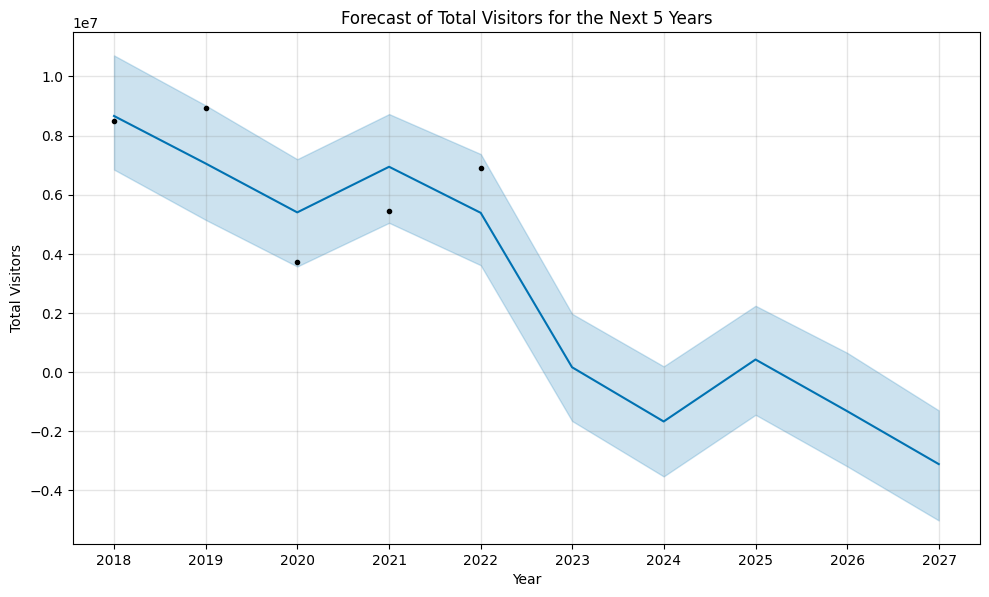

          ds          yhat    yhat_lower    yhat_upper
5 2022-12-31  1.630358e+05 -1.653998e+06  1.971373e+06
6 2023-12-31 -1.671531e+06 -3.530069e+06  1.939756e+05
7 2024-12-31  4.248433e+05 -1.445356e+06  2.242984e+06
8 2025-12-31 -1.322154e+06 -3.187709e+06  6.527581e+05
9 2026-12-31 -3.113571e+06 -5.020103e+06 -1.296373e+06


In [139]:

#This code will fit a Prophet model to the total number of visitors
#across all zones over the years 2018-2022 and make predictions 
#for the next 5 years. It will also plot the forecasted values along with the uncertainty intervals. Finally, it will display the forecasted values for the next 5 years.
from prophet import Prophet
import pandas as pd

# Assuming data is your DataFrame with columns ['Zone', '2018', '2019', '2020', '2021', '2022']
# We will sum the visitor counts for all zones to forecast the overall growth

# Sum the visitor counts across all zones
total_visitors = data[['2018', '2019', '2020', '2021', '2022']].sum(axis=0).reset_index()
total_visitors.columns = ['ds', 'y']

# Convert 'ds' to datetime format
total_visitors['ds'] = pd.to_datetime(total_visitors['ds'], format='%Y')

# Initialize and train the Prophet model
model = Prophet()
model.fit(total_visitors)

# Make predictions for the future
future = model.make_future_dataframe(periods=5, freq='Y')  # Forecast for the next 5 years
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast, xlabel='Year', ylabel='Total Visitors')
plt.title('Forecast of Total Visitors for the Next 5 Years')
plt.show()

# Show forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())  # Display the last 5 forecasted values


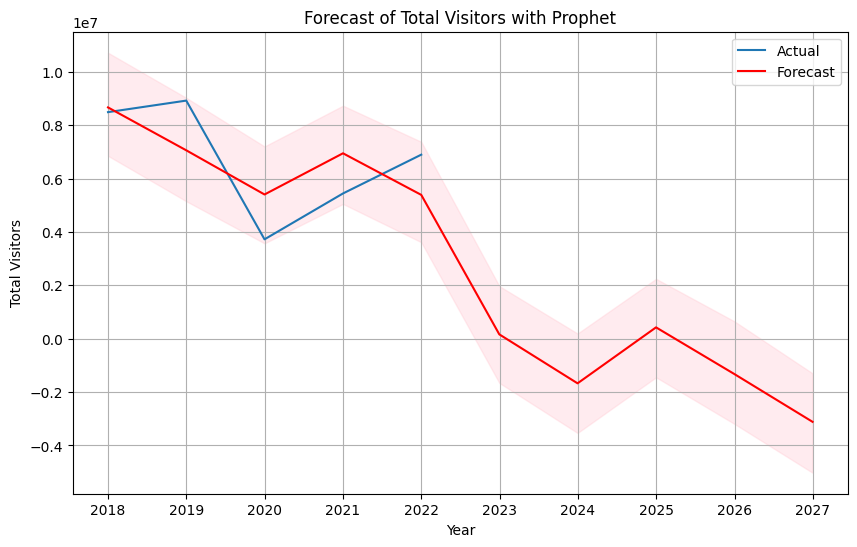

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the forecast using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(total_visitors['ds'], total_visitors['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Total Visitors')
plt.title('Forecast of Total Visitors with Prophet')
plt.legend()
plt.grid(True)
plt.show()





<function matplotlib.pyplot.show(close=None, block=None)>

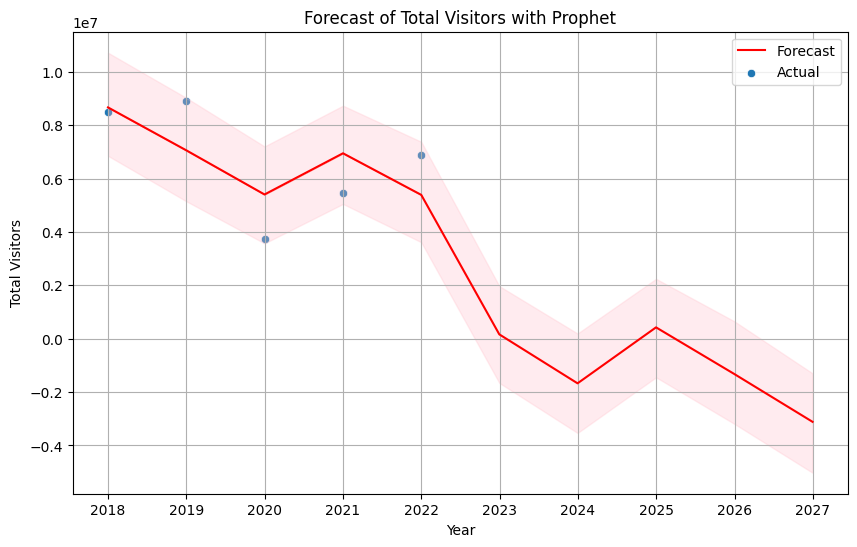

In [141]:
# Plot the forecast using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=pd.concat([total_visitors, forecast[['ds', 'yhat']]]), x='ds', y='yhat', label='Forecast', color='red')
sns.scatterplot(data=total_visitors, x='ds', y='y', label='Actual')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Total Visitors')
plt.title('Forecast of Total Visitors with Prophet')
plt.legend()
plt.grid(True)
plt.show

14:34:51 - cmdstanpy - INFO - Chain [1] start processing
14:34:51 - cmdstanpy - INFO - Chain [1] done processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] done processing
14:34:52 - cmdstanpy - INFO - Chain [1] start processing
14:34:52 - cmdstanpy - INFO - Chain [1] done processing
14:34:53 - cmdstanpy - INFO - Chain [1] start processing
14:34:53 - cmdstanpy - INFO - Chain [1] done processing
14:34:53 - cmdstanpy - INFO - Chain [1] start processing
14:34:53 - cmdstanpy - INFO - Chain [1] done processing
14:34:54 - cmdstanpy - INFO - Chain [1] start processing
14:34:54 - cmdstanpy - INFO - Chain [1] done processing
14:34:54 - cmdstanpy - INFO - Chain [1] start processing
14:34:54 - cmdstanpy - INFO - Chain [1] done processing
14:34:54 - cmdstanpy - INFO - Chain [1] start processing
14:34:54 - cmdstanpy - INFO - Chain [1] done processing
14:34:55 - cmdstanpy - INFO - Chain [1] start processing
14:34:55 - cmdstanpy - INFO - Chain [1]

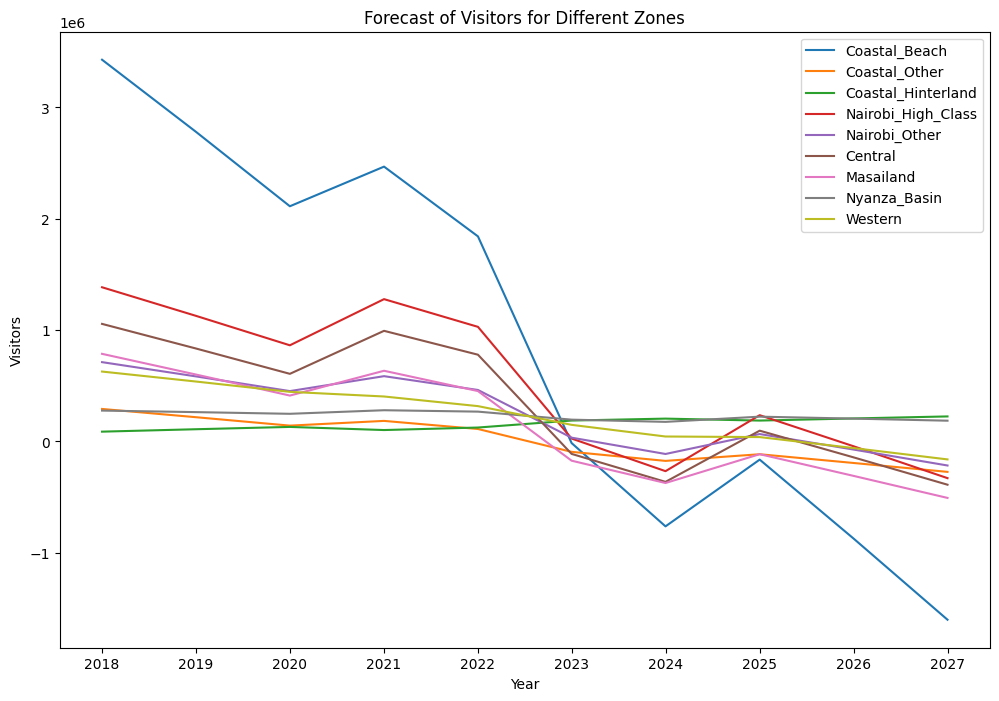

In [154]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Zone': ['Coastal_Beach', 'Coastal_Other', 'Coastal_Hinterland', 'Nairobi_High_Class', 'Nairobi_Other', 
             'Central', 'Masailand', 'Nyanza_Basin', 'Western'],
    '2018': [3329000, 280400, 107500, 1371700, 657000, 1128500, 827000, 226000, 560300],
    '2019': [3491300, 285100, 112000, 1430600, 774300, 947900, 801000, 382500, 695000],
    '2020': [1502600, 87200, 110000, 573700, 318300, 421200, 171200, 181200, 357400],
    '2021': [1967800, 142700, 62300, 1007700, 509700, 739800, 362300, 265100, 383900],
    '2022': [2347900, 154800, 165800, 1301800, 539700, 1034800, 727300, 284000, 338100]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Initialize an empty DataFrame to store forecast results
forecast_df = pd.DataFrame()

# Iterate over each zone to train a Prophet model and make predictions
for zone in df['Zone']:
    # Prepare data for the current zone
    zone_data = df[df['Zone'] == zone][['Zone', '2018', '2019', '2020', '2021', '2022']].T.reset_index()
    zone_data.columns = ['ds', 'y']
    
    # Skip rows where 'ds' is 'Zone'
    zone_data = zone_data[zone_data['ds'] != 'Zone']
    
    # Convert 'ds' to datetime format
    zone_data['ds'] = pd.to_datetime(zone_data['ds'], format='%Y')
    
    # Initialize and train the Prophet model for the current zone
    model = Prophet()
    model.fit(zone_data)
    
    # Make predictions for the next 5 years
    future = model.make_future_dataframe(periods=5, freq='Y')  # Forecast for the next 5 years
    forecast = model.predict(future)
    
    # Add zone name as a column in forecast DataFrame
    forecast['Zone'] = zone
    
    # Append forecast results to forecast DataFrame
    forecast_df = pd.concat([forecast_df, forecast], ignore_index=True)

# Plot the forecast for each zone
fig, ax = plt.subplots(figsize=(12, 8))
for zone in forecast_df['Zone'].unique():
    zone_forecast = forecast_df[forecast_df['Zone'] == zone]
    ax.plot(zone_forecast['ds'], zone_forecast['yhat'], label=zone)

ax.set_xlabel('Year')
ax.set_ylabel('Visitors')
ax.set_title('Forecast of Visitors for Different Zones')
ax.legend()
plt.show()


This code iterates over each zone, trains a separate Prophet model for each zone, makes predictions for the next 5 years, and then plots the forecasted number of visitors for each zone.

ValueError: Found input variables with inconsistent numbers of samples: [45, 90]

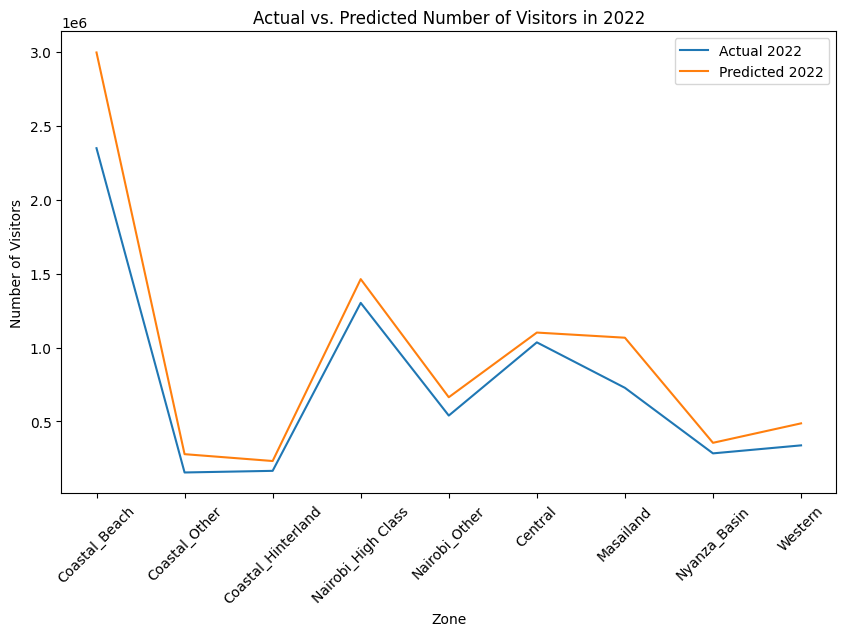

In [157]:


import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
data = {
    'Zone': ['Coastal_Beach', 'Coastal_Other', 'Coastal_Hinterland', 'Nairobi_High Class', 'Nairobi_Other', 
             'Central', 'Masailand', 'Nyanza_Basin', 'Western'],
    '2018': [3329000, 280400, 107500, 1371700, 657000, 1128500, 827000, 226000, 560300],
    '2019': [3491300, 285100, 112000, 1430600, 774300, 947900, 801000, 382500, 695000],
    '2020': [1502600, 87200, 110000, 573700, 318300, 421200, 171200, 181200, 357400],
    '2021': [1967800, 142700, 62300, 1007700, 509700, 739800, 362300, 265100, 383900],
    '2022': [2347900, 154800, 165800, 1301800, 539700, 1034800, 727300, 284000, 338100]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define features and target variable
X = df[['2018', '2019', '2020', '2021']]
y = df['2022']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict for the next year
next_year_prediction = model.predict([[data['2019'][i], data['2020'][i], data['2021'][i], data['2022'][i]] for i in range(len(data['Zone']))])

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(data['Zone'], data['2022'], label='Actual 2022')
plt.plot(data['Zone'], next_year_prediction, label='Predicted 2022')
plt.xticks(rotation=45)
plt.xlabel('Zone')
plt.ylabel('Number of Visitors')
plt.title('Actual vs. Predicted Number of Visitors in 2022')
plt.legend()
plt.show()


This code will create a bar plot showing the total number of visitors for each zone, sorted in descending order of total visitors. The seaborn library is used to create the plot, and matplotlib is used for additional customization and labeling.





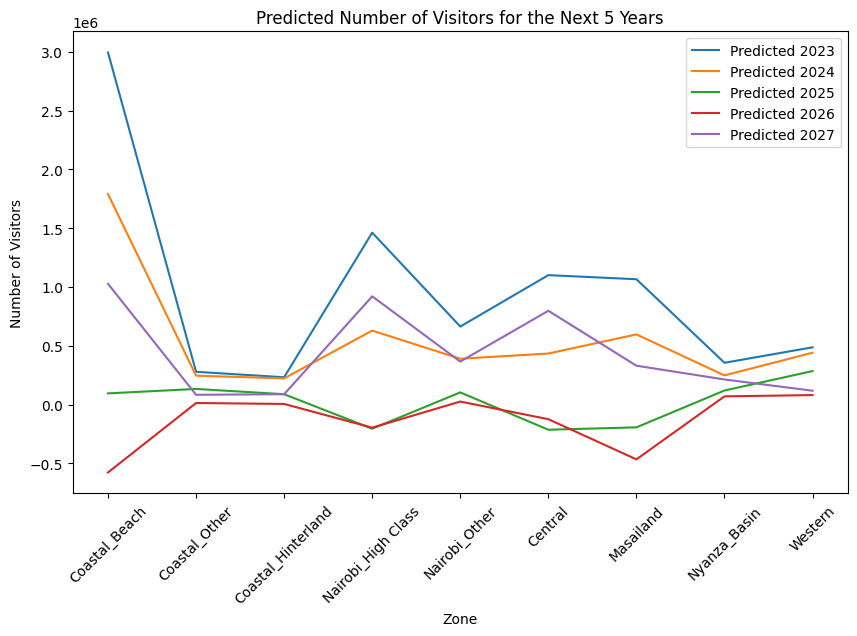

In [158]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'Zone': ['Coastal_Beach', 'Coastal_Other', 'Coastal_Hinterland', 'Nairobi_High Class', 'Nairobi_Other', 
             'Central', 'Masailand', 'Nyanza_Basin', 'Western'],
    '2018': [3329000, 280400, 107500, 1371700, 657000, 1128500, 827000, 226000, 560300],
    '2019': [3491300, 285100, 112000, 1430600, 774300, 947900, 801000, 382500, 695000],
    '2020': [1502600, 87200, 110000, 573700, 318300, 421200, 171200, 181200, 357400],
    '2021': [1967800, 142700, 62300, 1007700, 509700, 739800, 362300, 265100, 383900],
    '2022': [2347900, 154800, 165800, 1301800, 539700, 1034800, 727300, 284000, 338100]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define features and target variable
X = df[['2018', '2019', '2020', '2021']]
y = df['2022']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict for the next 5 years
next_five_years_predictions = []
for i in range(5):
    prediction = model.predict([[data['2019'][j], data['2020'][j], data['2021'][j], data['2022'][j]] for j in range(len(data['Zone']))])
    next_five_years_predictions.append(prediction)
    # Update the data for the next year
    data['2018'] = data['2019']
    data['2019'] = data['2020']
    data['2020'] = data['2021']
    data['2021'] = data['2022']
    data['2022'] = prediction

# Plot the predictions for the next 5 years
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(data['Zone'], next_five_years_predictions[i], label=f'Predicted {2023+i}')
plt.xticks(rotation=45)
plt.xlabel('Zone')
plt.ylabel('Number of Visitors')
plt.title('Predicted Number of Visitors for the Next 5 Years')
plt.legend()
plt.show()


This code will fit a Prophet model to the total number of visitors across all zones over the years 2018-2022 and make predictions for the next 5 years. It will also plot the forecasted values along with the uncertainty intervals. Finally, it will display the forecasted values for the next 5 years.